<a href="https://colab.research.google.com/github/Ever-Alarcon/Procesamiento-se-ales/blob/main/Sumatoria_de_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) Sumar señales senoidales (10,100,10)Hz
##2) RBG de 0.3

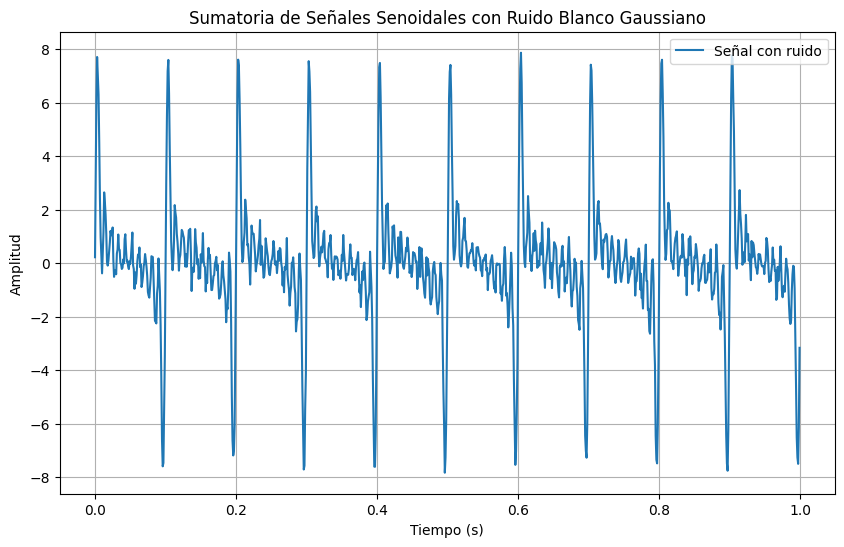

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1  # Duración de la señal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vector de tiempo

# Generar la sumatoria de señales senoidales
frecuencias = np.arange(10, 110, 10)  # Frecuencias de 10 Hz a 100 Hz
senal = sum(np.sin(2 * np.pi * f * t) for f in frecuencias)

# Añadir ruido blanco gaussiano
ruido = np.random.normal(0, 0.3, len(t))    #media, desviación y Número de muestras del ruido
senal_con_ruido = senal + ruido

# Graficar la señal
plt.figure(figsize=(10, 6))
plt.plot(t, senal_con_ruido, label='Señal con ruido')
plt.title('Sumatoria de Señales Senoidales con Ruido Blanco Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

##3)señal a FFT y luego a W.

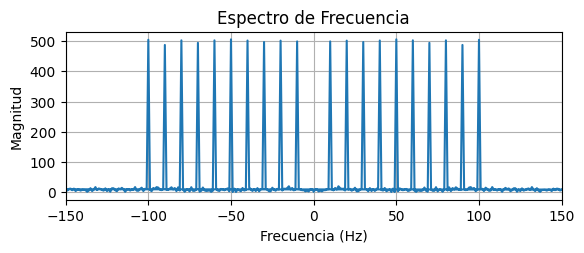

In [ ]:
from scipy.fftpack import fft, fftfreq


# Calcular la FFT
fft_result = np.fft.fft(senal_con_ruido)
fft_freq = np.fft.fftfreq(len(t), 1/fs)

# Graficar el espectro de frecuencia
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)  # Ajusta los límites según tus necesidades
plt.grid()

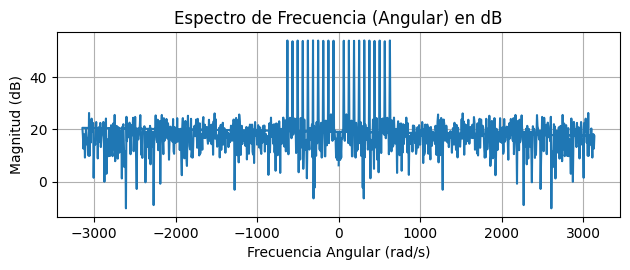

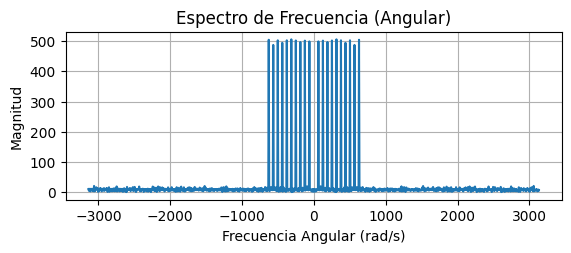

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

angular_freq = 2 * np.pi * fft_freq
# Magnitud en decibelios
magnitude_db = 20 * np.log10(np.abs(fft_result))


# Graficar espectro en frecuencia angular
plt.subplot(2, 1, 2)
plt.plot(angular_freq, magnitude_db)
plt.title('Espectro de Frecuencia (Angular) en dB')
plt.xlabel('Frecuencia Angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid()

plt.tight_layout()
plt.show()

# Plot
plt.subplot(2, 1, 2)
plt.plot(angular_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia (Angular)')
plt.xlabel('Frecuencia Angular (rad/s)')
plt.ylabel('Magnitud')
plt.grid()

##4) pasar de w a IFFT y obtener la señal original

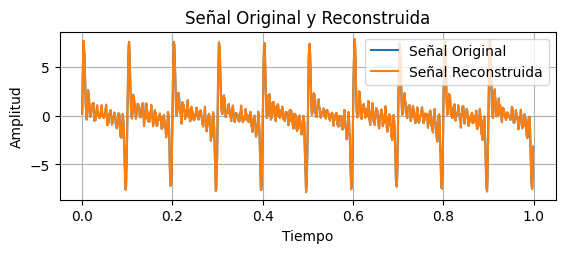

In [ ]:
# Calcular la FFT
#fft_result = np.fft.fft(senal_con_ruido)
#fft_freq = np.fft.fftfreq(len(t), 1/fs)


# Calcular la transformada inversa de Fourier
senal_reconstruida = np.fft.ifft(fft_result)

# Graficar la señal original y la reconstruida
plt.subplot(2, 1, 1)
plt.plot(t, senal_con_ruido, label='Señal Original')
plt.plot(t, senal_reconstruida.real, label='Señal Reconstruida')
plt.legend()
plt.title('Señal Original y Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

##5) Cortar armonicos de w=w_f
##6)w_f a IFFT a Signal_fit

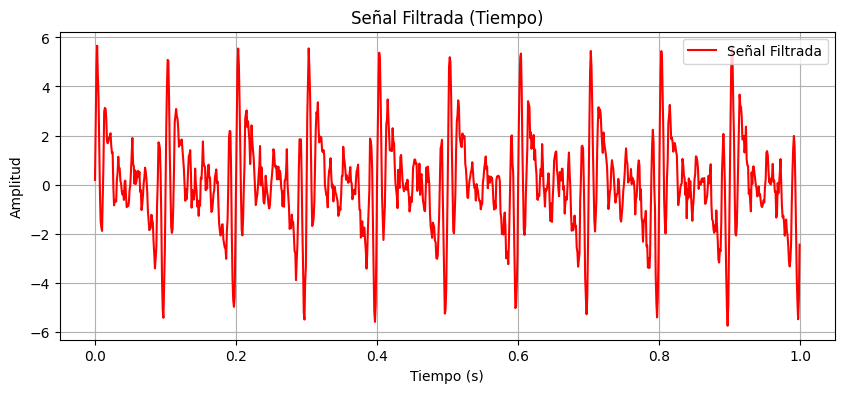

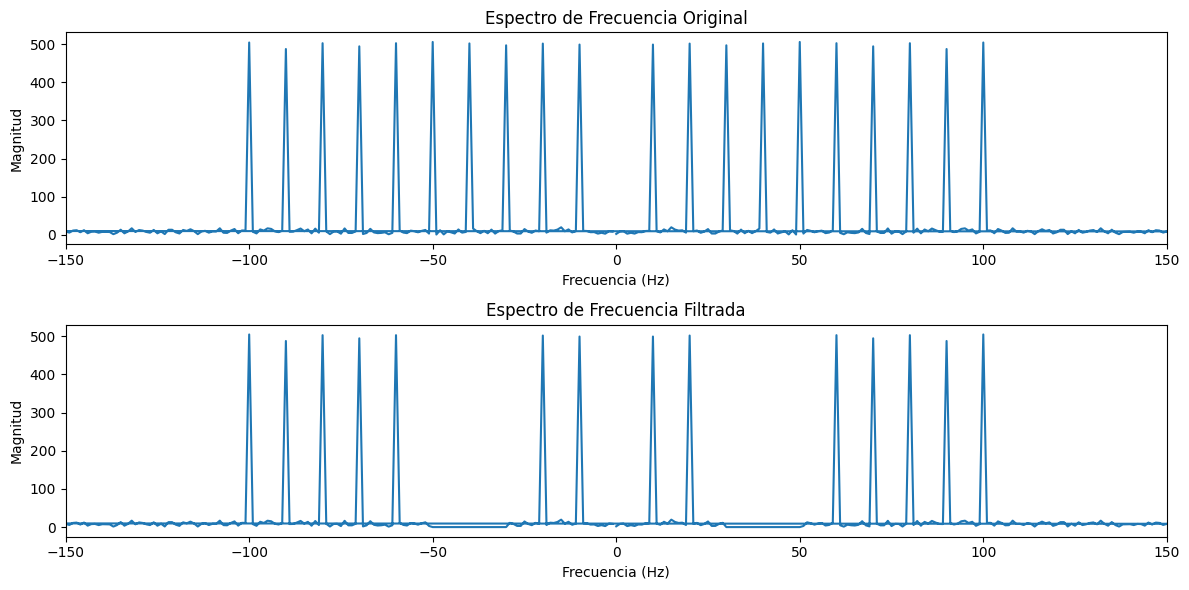

In [ ]:
# FFT de la señal
fft_result = np.fft.fft(senal_con_ruido)
fft_freq = np.fft.fftfreq(len(t), 1/fs)

# Aplicar el filtro eliminando frecuencias entre 30 Hz y 50 Hz
filtro = np.ones_like(fft_result)
filtro[(fft_freq >= 30) & (fft_freq <= 50)] = 0
filtro[(fft_freq <= -30) & (fft_freq >= -50)] = 0  # Filtrar las frecuencias negativas

fft_filtrada = fft_result * filtro

# Reconstruir la señal filtrada con IFFT
señal_filtrada = np.fft.ifft(fft_filtrada)

# Graficar la señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, señal_filtrada, label='Señal Filtrada', color='red')
#plt.plot(t, senal_filtrada.real, label='Señal Filtrada', color='red')
plt.title('Señal Filtrada (Tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


# Graficar el espectro antes y después del filtrado
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)

plt.subplot(2, 1, 2)
fft_result_filtrada = np.fft.fft(señal_filtrada)
plt.plot(fft_freq, np.abs(fft_result_filtrada))
plt.title('Espectro de Frecuencia Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)

plt.tight_layout()
plt.show()

##Punto 3) Ecualizador

In [13]:
!pip install dsp_utils

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

In [15]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

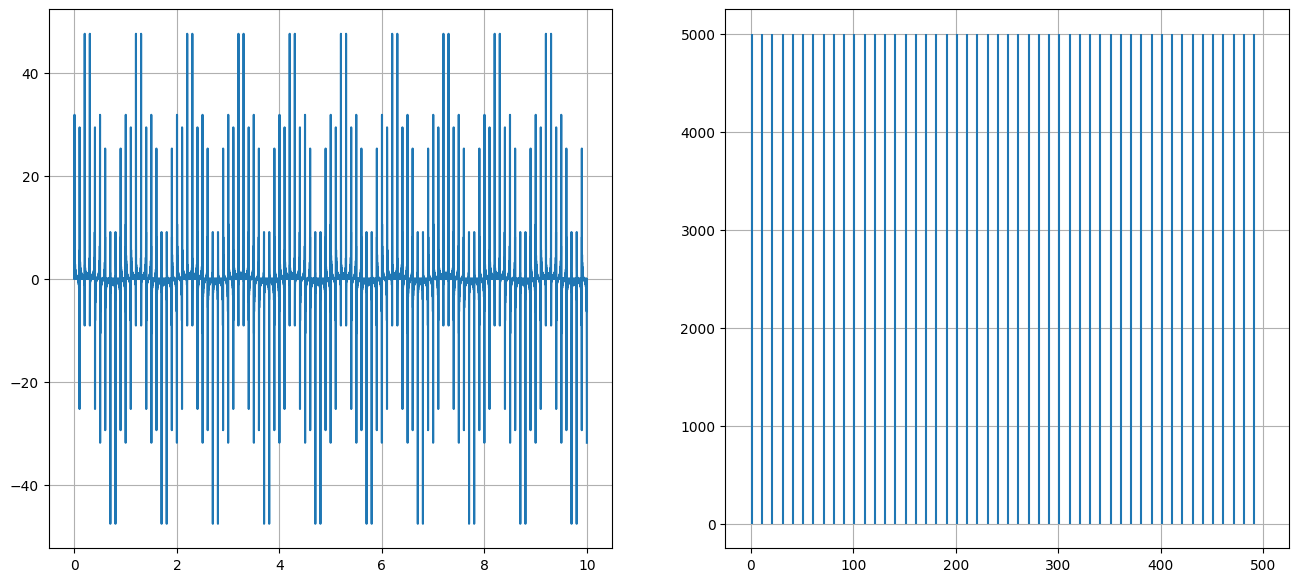

In [16]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [17]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

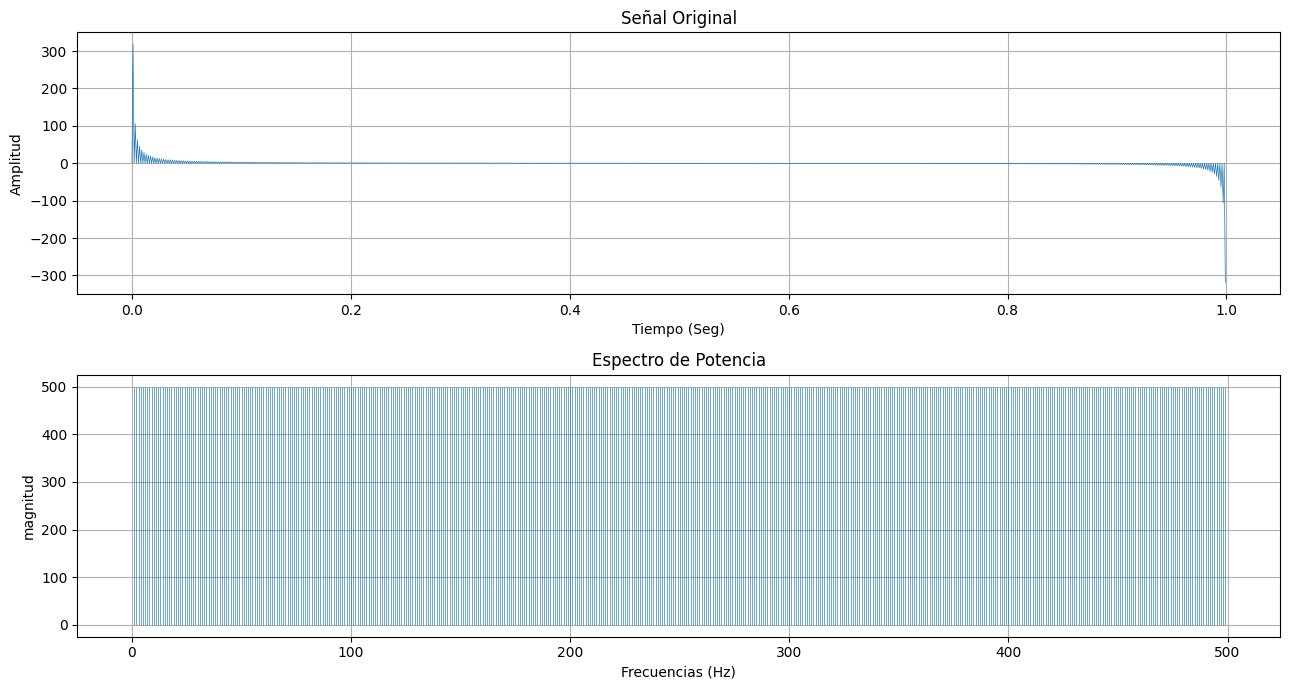

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from ipywidgets import interactive



# Señal Original

f = 1000
T = 1/f
t = np.arange(0,1,T)

signal = np.zeros(len(t))
for i in range(500):
  signal += np.sin(2*np.pi*(i+1)*t)

N = len(signal)         #número de muestras
spectrum_f = fftshift(fft(signal))        #saca FFT y centra frecuencias encero
frequencies_f = fftshift(fftfreq(N, T))

fig, axes = plt.subplots(2, 1, figsize=(13,7))

axes[0].plot(t, signal, linewidth=0.5)
axes[0].set_title("Señal Original")
axes[0].set_xlabel("Tiempo (Seg)")
axes[0].set_ylabel("Amplitud")
axes[0].grid(True)

axes[1].vlines(frequencies_f[N//2:], 0, np.abs(spectrum_f[N//2:]), linewidth=0.5, alpha = 0.9)         # el //2 es para greficar solo las frecuencias positivas
axes[1].set_title("Espectro de Potencia")
axes[1].set_ylabel("magnitud")
axes[1].set_xlabel("Frecuencias (Hz)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

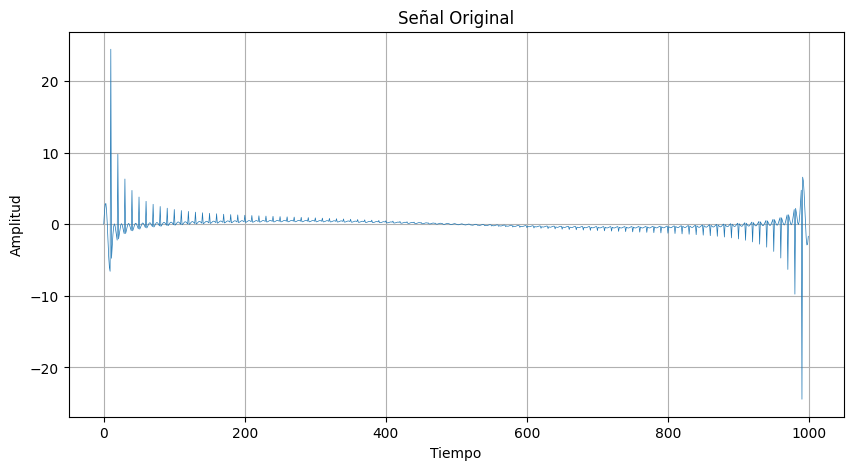

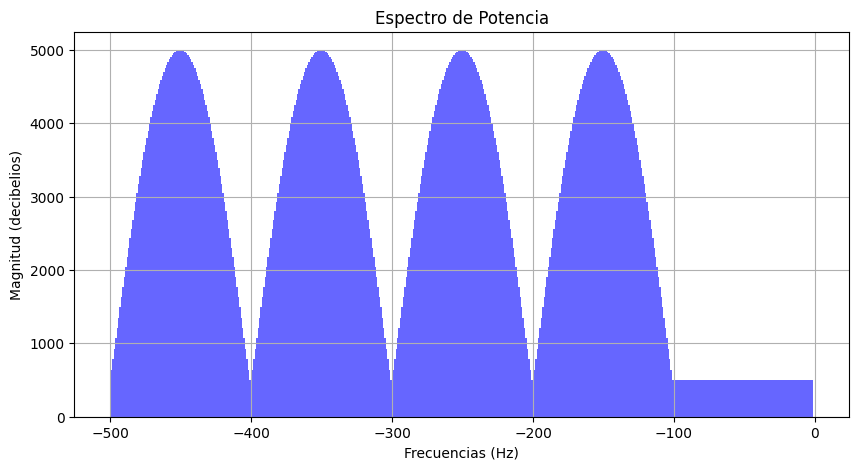

interactive(children=(IntSlider(value=0, description='decibelios1', max=10, min=-10), IntSlider(value=10, desc…

In [33]:
from ipywidgets import interactive, fixed
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft
import matplotlib.pyplot as plt

# Función que realiza los cálculos para la señal y espectro
def ecualizador(decibelios1, decibelios2, decibelios3, decibelios4, decibelios5):

    ganancias = [decibelios1, decibelios2, decibelios3, decibelios4, decibelios5]
    ganancias = [10**(ganancia / 10) for ganancia in ganancias]

    numero_bandas=5
    tamaño_segmento = (len(spectrum_f) // 2) // numero_bandas
    efecto_modulador = np.sin(np.linspace(0, np.pi, tamaño_segmento))

    punto_medio_espectro = len(spectrum_f) // 2
    espectro_dividido = [spectrum_f[punto_medio_espectro + i * tamaño_segmento : punto_medio_espectro + (i + 1) * tamaño_segmento]
                            for i in range(numero_bandas)]

    espectro_modificado = [parte * (ganancia - 1) * efecto_modulador + parte if ganancia != 1 else parte
                            for parte, ganancia in zip(espectro_dividido, ganancias)]

    espectro_alterado = np.concatenate(espectro_modificado)
    espectro_alterado = np.concatenate((espectro_alterado[::-1], espectro_alterado))

    frec_descentrada = np.fft.ifftshift(espectro_alterado)
    señal_tratada = np.fft.ifft(frec_descentrada)

    return señal_tratada, espectro_alterado

# Función para graficar la señal
def graficar_señal(señal_tratada):
    plt.figure(figsize=(10, 5))
    plt.plot(señal_tratada.real, linewidth=0.5)
    plt.title("Señal Original")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.show()

# Función para graficar el espectro de potencia
def graficar_espectro(frequencies_f, espectro_alterado, N):
    plt.figure(figsize=(10, 5))
    plt.bar(frequencies_f[:N // 2], np.abs(espectro_alterado[:N // 2]), width=1, color='b', alpha=0.6)
    plt.title("Espectro de Potencia")
    plt.ylabel("Magnitud (decibelios)")
    plt.xlabel("Frecuencias (Hz)")
    plt.grid(True)
    plt.show()

# Configuración del widget interactivo
interactive_plot = interactive(
    ecualizador,
    decibelios1=(-10, 10),
    decibelios2=(-10, 10),
    decibelios3=(-10, 10),
    decibelios4=(-10, 10),
    decibelios5=(-10, 10)
)

# Valores iniciales
interactive_plot.children[0].value = 0
interactive_plot.children[1].value = 100
interactive_plot.children[2].value = 200
interactive_plot.children[3].value = 300
interactive_plot.children[4].value = 400

# Mostrar el widget interactivo
#interactive_plot

# Usar los valores calculados en el widget interactivo
señal, espectro = ecualizador(
    interactive_plot.children[0].value,
    interactive_plot.children[1].value,
    interactive_plot.children[2].value,
    interactive_plot.children[3].value,
    interactive_plot.children[4].value
)

# Graficar la señal y el espectro en celdas separadas
graficar_señal(señal)
graficar_espectro(frequencies_f, espectro, N)

# Mostrar el widget interactivo
display(interactive_plot)
